# Early Infussion - Single Modelity

# Data Loading

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# combined the clinical data, genomatic data, and pathological data into a single csv file using Microsoft Excel
clinical_data = pd.read_csv('./data/merged_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
clinical_data.head()

,Unnamed: 0,dmp_pt_id,TMB,EGFR driver_binarized,ERBB2 driver_binarized,BRAF driver_binarized,MET driver_binarized,STK11 driver_binarized,ARID1A driver_binarized,EGFR: AMP_binarized,ERBB2: AMP_binarized,RET: AMP_binarized,MET: AMP_binarized,radiology_accession_number,main_index,record_id,de_i_id,albumin,smoking_status,pack_years,dnlr,pfs,pfs_censor,os_int,age,histo,ecog,bor,sex,dicom_path,did_mrn,did_acc,has_radiology_segmentation,radiologysegmentationpath,deid,n_lesions,impact_pdl1_same,clinical_pdl1_score,pdl1_image_id,slide_id,pdl1_tiss_site,hobbit_id,pdl1_acc,halo_tumor_quality,js_pdl1_score,impact_tissue_acc,site_lung,hist_adeno,label,liver_mets,brain_mets,tumor_burden,therapy_line,recieves_pdl1_therapy,recieves_pd1_therapy,recieves_combo_therapy,Exposure,TableSpeed,TotalCollimationWidth,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,scanner_discovery,scanner_lightspeed,scanner_revolution,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2
0,0,P-0000302,1,0,0,1,0,0,0,0,0,0,0,347908.000,R-55,55,1613957.000,4.000,1,28,3.600,32.700,0,NaN,67,Adenocarcinoma,2,2,1,/mskmind_lung/347908/SCANS/2/DICOM,RIA_18-193_000_453,347908.000,1.000,/gpfs/mskmind_ess/data/LUNG_18-193/radiology_s...,347908.000,2.000,2.000,0.000,NaN,NaN,lung,HobS16-466641016889,S16-47004,NaN,NaN,C14-3067,True,True,0,0.000,0.000,50.000,3.000,0.000,1.000,0.000,12.000,78.750,40.000,119.000,268.000,149.000,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,P-0003250,3,1,0,0,0,0,0,0,0,0,0,347906.000,R-51,51,1592856.000,3.500,0,0,2.800,0.900,0,NaN,54,Adenocarcinoma,1,3,2,/mskmind_lung/347906/SCANS/2/DICOM,RIA_18-193_000_451,347906.000,1.000,/gpfs/mskmind_ess/data/LUNG_18-193/radiology_s...,347906.000,1.000,2.000,0.000,OPU (share drive),NaN,lung,HobS16-732717408550,S16-49146,NaN,0.000,S14-65289,True,True,1,0.000,1.000,41.000,3.000,0.000,1.000,0.000,13.000,56.250,40.000,119.000,220.000,101.000,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,P-0003551,11,1,0,0,0,0,0,1,0,0,0,347921.000,R-71,71,1685782.000,4.000,0,0,1.700,1.300,1,NaN,50,Adenocarcinoma,1,4,2,/mskmind_lung/347921/SCANS/2/DICOM,RIA_18-193_000_466,347921.000,1.000,/gpfs/mskmind_ess/data/LUNG_18-193/radiology_s...,347921.000,2.000,1.000,0.000,3756130,3756130,lung,HobS17-352878424559,S17-45513,95.000,10.000,S17-45513,True,True,1,0.000,1.000,42.000,2.000,0.000,1.000,0.000,25.000,56.250,40.000,289.000,379.000,90.000,True,False,False,355601.000,1.000,193.958,7.625,135.766,5.940,54.909,1.066,4.172,305883.000,1.000,224.000,32.896,649.977,1.654,4.903,0.907,23.547
3,3,P-0003635,6,1,0,0,0,0,0,0,0,0,0,191201.000,R-34,34,1303420.000,4.200,0,0,3.100,1.500,1,2.400,58,Adenocarcinoma,2,4,2,/mskmind_lung/191201/SCANS/2/DICOM,RIA_18-193_000_053,191201.000,1.000,/gpfs/mskmind_ess/data/LUNG_18-193/radiology_s...,191201.000,1.000,2.000,0.000,NaN,NaN,lung,HobS15-499292736912,S15-66814,NaN,NaN,S15-9877,True,True,1,0.000,1.000,41

In [4]:
clinical_data.shape

(247, 83)

In [5]:
clinical_data.describe()

,Unnamed: 0,TMB,EGFR driver_binarized,ERBB2 driver_binarized,BRAF driver_binarized,MET driver_binarized,STK11 driver_binarized,ARID1A driver_binarized,EGFR: AMP_binarized,ERBB2: AMP_binarized,RET: AMP_binarized,MET: AMP_binarized,radiology_accession_number,record_id,de_i_id,albumin,smoking_status,dnlr,pfs,pfs_censor,os_int,age,ecog,bor,sex,did_acc,has_radiology_segmentation,deid,n_lesions,impact_pdl1_same,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,label,liver_mets,brain_mets,tumor_burden,therapy_line,recieves_pdl1_therapy,recieves_pd1_therapy,recieves_combo_therapy,Exposure,TableSpeed,TotalCollimationWidth,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2
count,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,152.000,247.000,247.000,247.000,247.000,247.000,246.000,247.000,189.000,246.000,246.000,164.000,201.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,190.000,190.000,190.000,190.000,190.000,190.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000
mean,123.000,10.182,0.089,0.077,0.028,0.049,0.178,0.065,0.040,0.024,0.004,0.020,296419.377,124.000,1683895.656,3.712,1.117,3.262,6.584,0.846,8.122,66.911,0.992,3.858,1.543,296419.377,0.768,296419.377,1.757,1.236,24.793,87.470,28.587,0.749,0.259,0.275,58.862,1.891,0.202,0.798,0.049,16.132,63.717,39.368,145.553,294.642,149.089,55545969.648,1.000,242.297,22.270,1276.677,3.905,31.687,1.301,9.056,50989514.038,1.000,247.219,52.457,2029.637,1.466,3.522,0.972,35.168
std,71.447,11.278,0.285,0.267,0.166,0.215,0.383,0.247,0.197,0.154,0.064,0.141,73948.028,71.447,384149.378,0.442,0.583,3.240,8.082,0.362,7.741,9.764,0.477,1.850,0.499,73948.028,0.423,73948.028,0.907,0.425,34.828,13.718,36.404,0.434,0.439,0.448,43.407,0.865,0.403,0.403,0.215,6.565,11.076,3.507,51.595,82.060,70.383,147960210.958,0.000,27.534,19.261,1510.646,2.441,50.294,0.273,7.592,140602452.360,0.000,14.073,26.418,1554.505,0.799,5.188,0.224,18.331
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,190323.000,1.000,114933.000,2.400,0.000,0.500,0.100,0.000,0.100,38.000,0.000,1.000,1.000,190323.000,0.000,190323.000,0.000,1.000,0.000,50.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,7.000,55.000,20.000,118.000,131.000,0.000,355601.000,1.000,149.000,1.609,10.407,0.539,-0.915,0.519,1.223,305883.000,1.000,195.000,9.188,102.586,-0.146,-1.363,0.000,6.204
25%,61.500,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,190997.500,62.500,1645903.000,3.400,1.000,1.800,1.400,1.000,2.075,61.500,1.000,2.500,1.000,190997.500,1.000,190997.500,1.000,1.000,0.000,80.000,0.000,0.500,0.000,0.000,27.000,1.000,0.000,1.000,0.000,11.000,56.250,40.000,119.000,220.000,100.000,2669362.000,1.000,253.667,8.256,188

In [6]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 83 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Unnamed: 0                                                               247 non-null    int64  
 1   dmp_pt_id                                                                247 non-null    object 
 2   TMB                                                                      247 non-null    int64  
 3   EGFR driver_binarized                                                    247 non-null    int64  
 4   ERBB2 driver_binarized                                                   247 non-null    int64  
 5   BRAF driver_binarized                                                    247 non-null    int64  
 6   MET driver_binarized                                                     2

In [7]:
# checking and dropping dublicate values
print(clinical_data.duplicated().sum())
clinical_data.drop_duplicates(inplace=True)

0


In [8]:
# printing the sum of unique values in each column
for i in clinical_data.columns:
  print(i)
  print(clinical_data[i].nunique())
  print('\n')

Unnamed: 0
247


dmp_pt_id
247


TMB
40


EGFR driver_binarized
2


ERBB2 driver_binarized
2


BRAF driver_binarized
2


MET driver_binarized
2


STK11 driver_binarized
2


ARID1A driver_binarized
2


EGFR: AMP_binarized
2


ERBB2: AMP_binarized
2


RET: AMP_binarized
2


MET: AMP_binarized
2


radiology_accession_number
247


main_index
247


record_id
247


de_i_id
247


albumin
24


smoking_status
3


pack_years
91


dnlr
70


pfs
117


pfs_censor
2


os_int
106


age
46


histo
8


ecog
4


bor
8


sex
2


dicom_path
246


did_mrn
246


did_acc
247


has_radiology_segmentation
2


radiologysegmentationpath
189


deid
247


n_lesions
5


impact_pdl1_same
2


clinical_pdl1_score
18


pdl1_image_id
189


slide_id
191


pdl1_tiss_site
32


hobbit_id
246


pdl1_acc
246


halo_tumor_quality
6


js_pdl1_score
13


impact_tissue_acc
246


site_lung
2


hist_adeno
2


label
2


liver_mets
2


brain_mets
2


tumor_burden
108


therapy_line
7


recieves_pdl1_therapy
2


recieves_pd1_therapy
2

# Data Preprocessing

In [9]:
# dropping all unwanted columns
clinical_data.drop(columns=['label', 'os_int', 'bor'], inplace=True) # mandotory drop
clinical_data.drop(columns=['Unnamed: 0', 'dmp_pt_id', 'radiology_accession_number', 'main_index', 'record_id', 'de_i_id', 'dicom_path',
                            'did_mrn', 'did_acc', 'radiologysegmentationpath', 'deid', 'pdl1_image_id', 'slide_id', 'hobbit_id',
                            'pdl1_acc', 'impact_tissue_acc'], inplace=True) # optional drop

In [10]:
# checking for missing values
clinical_data.isnull().sum()

TMB                                                                          0
EGFR driver_binarized                                                        0
ERBB2 driver_binarized                                                       0
BRAF driver_binarized                                                        0
MET driver_binarized                                                         0
STK11 driver_binarized                                                       0
ARID1A driver_binarized                                                      0
EGFR: AMP_binarized                                                          0
ERBB2: AMP_binarized                                                         0
RET: AMP_binarized                                                           0
MET: AMP_binarized                                                           0
albumin                                                                      0
smoking_status                                      

In [11]:
# collecting all columns with missing values 
missing_value_columns = ['albumin', 'dnlr', 'has_radiology_segmentation', 'n_lesions', 'impact_pdl1_same', 'clinical_pdl1_score',
                         'pdl1_tiss_site', 'halo_tumor_quality', 'js_pdl1_score', 'site_lung', 'Exposure', 'TableSpeed',
                         'TotalCollimationWidth', 'XRayTubeCurrent_min', 'XRayTubeCurrent_max', 'XRayTubeCurrent_range',
                         'scanner_discovery', 'scanner_lightspeed', 'scanner_revolution', 'liver_mets', 'brain_mets', 'tumor_burden',
                         'therapy_line', 'recieves_pdl1_therapy', 'recieves_pd1_therapy', 'recieves_combo_therapy',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_min',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_max',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0',
                         'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2',
                         'pixel_original_glcm_None_scale_None_channel_1_nobs',
                         'pixel_original_glcm_None_scale_None_channel_1_min',
                         'pixel_original_glcm_None_scale_None_channel_1_max',
                         'pixel_original_glcm_None_scale_None_channel_1_mean',
                         'pixel_original_glcm_None_scale_None_channel_1_variance',
                         'pixel_original_glcm_None_scale_None_channel_1_skewness',
                         'pixel_original_glcm_None_scale_None_channel_1_kurtosis',
                         'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0',
                         'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2']

# imputting missing values by mode
for i in missing_value_columns:
    clinical_data[i]=clinical_data[i].fillna(clinical_data[i].mode()[0])

# checking for missing values
clinical_data.isnull().sum()

TMB                                                                        0
EGFR driver_binarized                                                      0
ERBB2 driver_binarized                                                     0
BRAF driver_binarized                                                      0
MET driver_binarized                                                       0
STK11 driver_binarized                                                     0
ARID1A driver_binarized                                                    0
EGFR: AMP_binarized                                                        0
ERBB2: AMP_binarized                                                       0
RET: AMP_binarized                                                         0
MET: AMP_binarized                                                         0
albumin                                                                    0
smoking_status                                                             0

In [12]:
# converting 'pack_years' column from (object) to (float) data type
clinical_data['pack_years'].replace(to_replace=['unk', 'Cigars'], value=0, inplace=True)
clinical_data['pack_years'] = clinical_data['pack_years'].astype(float)

In [13]:
# replacing (re-annotate) and (exclude) values with (0) in the 'halo_tumor_quality' column
clinical_data['halo_tumor_quality'].replace(to_replace=['re-annotate', 'exclude'], value=0, inplace=True)
clinical_data['halo_tumor_quality'] = clinical_data['halo_tumor_quality'].astype(float)

In [14]:
# converting 'sex' column from (int) to (object) data type
clinical_data['sex'].replace(to_replace=[1], value='male', inplace=True)
clinical_data['sex'].replace(to_replace=[2], value='female', inplace=True)
clinical_data['sex'] = clinical_data['sex'].astype(object)

In [15]:
# converting (object) data type columns to (int) data type
clinical_data['scanner_discovery'] = clinical_data['scanner_discovery'].astype(int)
clinical_data['scanner_lightspeed'] = clinical_data['scanner_lightspeed'].astype(int)
clinical_data['scanner_revolution'] = clinical_data['scanner_revolution'].astype(int)
clinical_data['site_lung'] = clinical_data['site_lung'].astype(int)
clinical_data['hist_adeno'] = clinical_data['hist_adeno'].astype(int)

In [16]:
# collecting catagorical columns that needs one-hot encoding
catagorical_columns = ['smoking_status', 'histo', 'ecog', 'sex', 'n_lesions', 'pdl1_tiss_site', 'therapy_line']
# printing the columns' values
for i in catagorical_columns:
    print(clinical_data[i].value_counts())

smoking_status
1    160
2     58
0     29
Name: count, dtype: int64
histo
Adenocarcinoma    184
Squamous           36
NOS                18
Large cell          5
Adenosquamous       1
Large Cell          1
Giant Cell          1
Pleomorphic         1
Name: count, dtype: int64
ecog
1    194
0     28
2     24
3      1
Name: count, dtype: int64
sex
female    134
male      113
Name: count, dtype: int64
n_lesions
1.000    148
2.000     59
3.000     28
4.000     10
0.000      2
Name: count, dtype: int64
pdl1_tiss_site
lung                        110
lymph node                   43
bone                         15
pleura                       15
liver                        11
adrenal                      11
brain                         8
chest wall                    6
pleural fluid                 4
peritoneum                    2
soft tissue (L2)              1
soft tissue (gluteus)         1
soft tissue (chest wall)      1
unknown                       1
soft tissue (humerus)         1
tra

In [17]:
clinical_data[catagorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   smoking_status  247 non-null    int64  
 1   histo           247 non-null    object 
 2   ecog            247 non-null    int64  
 3   sex             247 non-null    object 
 4   n_lesions       247 non-null    float64
 5   pdl1_tiss_site  247 non-null    object 
 6   therapy_line    247 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.6+ KB


In [18]:
# collecting numerical columns that needs min-max scalling
numerical_columns = ['albumin', 'pack_years', 'dnlr', 'pfs', 'age', 'clinical_pdl1_score', 'halo_tumor_quality', 'js_pdl1_score',
                     'tumor_burden', 'Exposure', 'TableSpeed', 'XRayTubeCurrent_min', 'XRayTubeCurrent_max', 'XRayTubeCurrent_range',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_min',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_max',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0',
                     'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2',
                     'pixel_original_glcm_None_scale_None_channel_1_nobs',
                     'pixel_original_glcm_None_scale_None_channel_1_min',
                     'pixel_original_glcm_None_scale_None_channel_1_max',
                     'pixel_original_glcm_None_scale_None_channel_1_mean',
                     'pixel_original_glcm_None_scale_None_channel_1_variance',
                     'pixel_original_glcm_None_scale_None_channel_1_skewness',
                     'pixel_original_glcm_None_scale_None_channel_1_kurtosis',
                     'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0',
                     'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2']
# printing the columns' values
clinical_data[numerical_columns].describe()

,albumin,pack_years,dnlr,pfs,age,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,tumor_burden,Exposure,TableSpeed,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2
count,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000
mean,3.712,28.905,3.262,6.584,66.911,24.692,90.000,23.263,58.862,14.717,61.994,139.425,277.186,137.761,23817093.745,1.000,250.175,10.392,548.700,1.970,12.944,0.852,4.552,21851556.113,1.000,251.117,27.581,921.778,0.539,0.713,0.413,18.517
std,0.442,26.191,3.240,8.082,9.764,34.793,11.722,34.667,43.407,6.310,10.207,46.593,78.698,65.080,100013409.189,0.000,19.146,16.174,1165.430,2.302,36.472,0.426,6.279,94805041.670,0.000,9.747,27.467,1390.266,0.952,4.152,0.503,18.652
min,2.400,0.000,0.500,0.100,38.000,0.000,50.000,0.000,0.000,7.000,55.000,118.000,131.000,0.000,355601.000,1.000,149.000,1.609,10.407,0.539,-0.915,0.519,1.223,305883.000,1.000,195.000,9.188,102.586,-0.146,-1.363,0.000,6.204
25%,3.400,9.500,1.800,1.400,61.500,0.000,95.000,0.000,27.000,10.000,56.250,119.000,219.000,100.000,355601.000,1.000,256.000,1.609,10.407,0.539,-0.915,0.519,1.223,305883.000,1.000,254.000,9.188,102.586,-0.146,-1.363,0.000,6.204
50%,3.800,24.500,2.500,2.700,68.000,0.000,95.000,0.000,51.000,12.000,56.250,120.000,241.000,101.000,355601.000,1.000,256.000,1.609,10.407,0.539,-0.915,0.519,1.223,305883.000,1.000,254.000,9.188,102.586,-0.146,-1.363,0.000,6.204
75%,4.100,42.750,3.750,9.300,73.000,60.000,95.000,50.000,76.000,18.000,67.500,129.500,372.000,177.500,8001828.500,1.000,256.000,11.617,397.917,3.148,11.176,1.199,5.183,7277260.000,1.000,254.000,40.380,1197.184,1.358,2.035,0.974,27.805
max,4.700,165.000,33.100,49.100,93.000,100.000,95.000,95.000,287.000,40.000,110.000,379.000,645.000,444.000,1254452175.000,1.000,256.000,86.769,6212.704,16.276,409.565,1.929,40.826,1223973577.000,1.000,254.000,129.028,6117.886,4.652,37.979,1.388,97.210


In [19]:
clinical_data[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 32 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   albumin                                                                  247 non-null    float64
 1   pack_years                                                               247 non-null    float64
 2   dnlr                                                                     247 non-null    float64
 3   pfs                                                                      247 non-null    float64
 4   age                                                                      247 non-null    int64  
 5   clinical_pdl1_score                                                      247 non-null    float64
 6   halo_tumor_quality                                                       2

# Data Transformation

In [20]:
catagorical_clinical_data = clinical_data[catagorical_columns]
numerical_columns_data = clinical_data[numerical_columns]

### Encoding Catagorical Features

In [21]:
encoded_clinical_data = pd.get_dummies(catagorical_clinical_data)

In [22]:
encoded_clinical_data.head()

,smoking_status,ecog,n_lesions,therapy_line,histo_Adenocarcinoma,histo_Adenosquamous,histo_Giant Cell,histo_Large Cell,histo_Large cell,histo_NOS,histo_Pleomorphic,histo_Squamous,sex_female,sex_male,pdl1_tiss_site_adrenal,pdl1_tiss_site_ascites,pdl1_tiss_site_bone,"pdl1_tiss_site_bone, soft tissue",pdl1_tiss_site_brain,pdl1_tiss_site_chest wall,pdl1_tiss_site_duodenum,pdl1_tiss_site_liver,pdl1_tiss_site_lung,pdl1_tiss_site_lymph node,pdl1_tiss_site_mediastinum,pdl1_tiss_site_pelvis,pdl1_tiss_site_peritoneum,pdl1_tiss_site_pleura,pdl1_tiss_site_pleural fluid,"pdl1_tiss_site_skin, muscle, fat",pdl1_tiss_site_soft tissue (C2),pdl1_tiss_site_soft tissue (L2),pdl1_tiss_site_soft tissue (L3),pdl1_tiss_site_soft tissue (T9),pdl1_tiss_site_soft tissue (abdomen),pdl1_tiss_site_soft tissue (chest wall),pdl1_tiss_site_soft tissue (glenoid),pdl1_tiss_site_soft tissue (gluteus),pdl1_tiss_site_soft tissue (humerus),pdl1_tiss_site_soft tissue (iliac),pdl1_tiss_site_soft tissue (neck),pdl1_tiss_site_soft tissue (rib),pdl1_tiss_site_soft tissue (spine),pdl1_tiss_site_soft tissue (thigh),pdl1_tiss_site_trachea,pdl1_tiss_site_unknown
0,1,2,2.000,3.000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,1,1.000,3.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,1,2.000,2.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,2,1.000,3.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,1,1.000,4.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Scalling Numerical Features

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_clinical_data = pd.DataFrame(scaler.fit_transform(numerical_columns_data))
scaled_clinical_data.columns = numerical_columns_data.columns

In [24]:
scaled_clinical_data.head()

,albumin,pack_years,dnlr,pfs,age,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,tumor_burden,Exposure,TableSpeed,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2
0,0.696,0.170,0.095,0.665,0.527,0.000,1.000,0.000,0.174,0.152,0.432,0.004,0.267,0.336,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.478,0.000,0.071,0.016,0.291,0.000,1.000,0.000,0.143,0.182,0.023,0.004,0.173,0.227,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.696,0.000,0.037,0.024,0.218,0.000,1.000,0.105,0.146,0.545,0.023,0.655,0.482,0.203,0.000,0.000,0.420,0.071,0.020,0.343,0.136,0.387,0.074,0.000,0.000,0.492,0.198,0.091,0.375,0.159,0.654,0.191
3,0.783,0.000,0.080,0.029,0.364,0.000,1.000,0.000,0.143,0.091,0.023,0.004,0.171,0.225,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.435,0.015,0.071,0.016,0.545,0.000,1.000,0.000,0.265,0.091,0.023,0.004,0.171,0.225,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [25]:
scaled_clinical_data.describe()

,albumin,pack_years,dnlr,pfs,age,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,tumor_burden,Exposure,TableSpeed,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2
count,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000
mean,0.570,0.175,0.085,0.132,0.526,0.247,0.889,0.245,0.205,0.234,0.127,0.082,0.284,0.310,0.019,0.000,0.946,0.103,0.087,0.091,0.034,0.236,0.084,0.018,0.000,0.951,0.153,0.136,0.143,0.053,0.298,0.135
std,0.192,0.159,0.099,0.165,0.178,0.348,0.260,0.365,0.151,0.191,0.186,0.179,0.153,0.147,0.080,0.000,0.179,0.190,0.188,0.146,0.089,0.302,0.159,0.077,0.000,0.165,0.229,0.231,0.199,0.106,0.363,0.205
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.435,0.058,0.040,0.027,0.427,0.000,1.000,0.000,0.094,0.091,0.023,0.004,0.171,0.225,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.609,0.148,0.061,0.053,0.545,0.000,1.000,0.000,0.178,0.152,0.023,0.008,0.214,0.227,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.739,0.259,0.100,0.188,0.636,0.600,1.000,0.526,0.265,0.333,0.227,0.044,0.469,0.400,0.006,0.000,1.000,0.118,0.062,0.166,0.029,0.482,0.100,0.006,0.000,1.000,0.260,0.182,0.313,0.086,0.702,0.237
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [26]:
final_clinical_data = pd.concat([scaled_clinical_data, encoded_clinical_data], axis=1)

In [27]:
final_clinical_data.head()

,albumin,pack_years,dnlr,pfs,age,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,tumor_burden,Exposure,TableSpeed,XRayTubeCurrent_min,XRayTubeCurrent_max,XRayTubeCurrent_range,pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs,pixel_original_glcm_Autocorrelation_scale_None_channel_1_min,pixel_original_glcm_Autocorrelation_scale_None_channel_1_max,pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean,pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance,pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness,pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2,pixel_original_glcm_None_scale_None_channel_1_nobs,pixel_original_glcm_None_scale_None_channel_1_min,pixel_original_glcm_None_scale_None_channel_1_max,pixel_original_glcm_None_scale_None_channel_1_mean,pixel_original_glcm_None_scale_None_channel_1_variance,pixel_original_glcm_None_scale_None_channel_1_skewness,pixel_original_glcm_None_scale_None_channel_1_kurtosis,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0,pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2,smoking_status,ecog,n_lesions,therapy_line,histo_Adenocarcinoma,histo_Adenosquamous,histo_Giant Cell,histo_Large Cell,histo_Large cell,histo_NOS,histo_Pleomorphic,histo_Squamous,sex_female,sex_male,pdl1_tiss_site_adrenal,pdl1_tiss_site_ascites,pdl1_tiss_site_bone,"pdl1_tiss_site_bone, soft tissue",pdl1_tiss_site_brain,pdl1_tiss_site_chest wall,pdl1_tiss_site_duodenum,pdl1_tiss_site_liver,pdl1_tiss_site_lung,pdl1_tiss_site_lymph node,pdl1_tiss_site_mediastinum,pdl1_tiss_site_pelvis,pdl1_tiss_site_peritoneum,pdl1_tiss_site_pleura,pdl1_tiss_site_pleural fluid,"pdl1_tiss_site_skin, muscle, fat",pdl1_tiss_site_soft tissue (C2),pdl1_tiss_site_soft tissue (L2),pdl1_tiss_site_soft tissue (L3),pdl1_tiss_site_soft tissue (T9),pdl1_tiss_site_soft tissue (abdomen),pdl1_tiss_site_soft tissue (chest wall),pdl1_tiss_site_soft tissue (glenoid),pdl1_tiss_site_soft tissue (gluteus),pdl1_tiss_site_soft tissue (humerus),pdl1_tiss_site_soft tissue (iliac),pdl1_tiss_site_soft tissue (neck),pdl1_tiss_site_soft tissue (rib),pdl1_tiss_site_soft tissue (spine),pdl1_tiss_site_soft tissue (thigh),pdl1_tiss_site_trachea,pdl1_tiss_site_unknown
0,0.696,0.170,0.095,0.665,0.527,0.000,1.000,0.000,0.174,0.152,0.432,0.004,0.267,0.336,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2,2.000,3.000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.478,0.000,0.071,0.016,0.291,0.000,1.000,0.000,0.143,0.182,0.023,0.004,0.173,0.227,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0,1,1.000,3.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.696,0.000,0.037,0.024,0.218,0.000,1.000,0.105,0.146,0.545,0.023,0.655,0.482,0.203,0.000,0.000,0.420,0.071,0.020,0.343,0.136,0.387,0.074,0.000,0.000,0.492,0.198,0.091,0.375,0.159,0.654,0.191,0,1,2.000,2.000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.783,0.000,0.080,0.029,0.364,0.000,1.000,0.000,0.143,0.091,0.023,0.004,0.171,0.225,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0,2,1.000,3.000,True,False,False,False,

### Feature Engineering

In [28]:
# showing the correlation between features
final_clinical_data_corr = final_clinical_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
final_clinical_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
#filtered_final_clinical_data_corr = final_clinical_data_corr[(final_clinical_data_corr['Correlation Coefficient'] >= 0.8) & (final_clinical_data_corr['Correlation Coefficient'] <= 1.0)].all()
filtered_final_clinical_data_corr = final_clinical_data_corr[final_clinical_data_corr['Correlation Coefficient'].between(0.8, 0.99)]
# Print the filtered dataframe
high_corr_features = filtered_final_clinical_data_corr[['Feature 1', 'Feature 2']]
"""
for i in high_corr_features.columns:
    print(high_corr_features[i].value_counts())
"""
high_corr_features

,Feature 1,Feature 2
86,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_Autocorrelation_scale_None...
87,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_Autocorrelation_scale_None...
88,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_Autocorrelation_scale_None...
89,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_Autocorrelation_scale_None...
90,pixel_original_glcm_None_scale_None_channel_1_...,pixel_original_glcm_Autocorrelation_scale_None...
91,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_None_scale_None_channel_1_...
92,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_None_scale_None_channel_1_...
93,pixel_original_glcm_None_scale_None_channel_1_...,pixel_original_glcm_Autocorrelation_scale_None...
94,pixel_original_glcm_Autocorrelation_scale_None...,pixel_original_glcm_None_scale_None_channel_1_...
95,pixel_original_glcm_None_scale_None_channel_1_...,pixel_original_glcm_Autocorrelation_scale_None...


In [29]:
# save the high correlated features in a csv
#high_corr_features.to_csv("high_corr_features.csv")


After analyizing the file we found that we don't really need the pathology data because its highly correlated with some of the clinical data. So, it does not add any more value to our model's learning proccess.

In [30]:
# removing the highly correlated features (Pathology Data)
pathology_data_columns = ['XRayTubeCurrent_range', 'pixel_original_glcm_Autocorrelation_scale_None_channel_1_nobs',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_min',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_max',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_mean',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_variance',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_skewness',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_kurtosis',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p0',
                          'pixel_original_glcm_Autocorrelation_scale_None_channel_1_lognorm_fit_p2',
                          'pixel_original_glcm_None_scale_None_channel_1_nobs',
                          'pixel_original_glcm_None_scale_None_channel_1_min',
                          'pixel_original_glcm_None_scale_None_channel_1_max',
                          'pixel_original_glcm_None_scale_None_channel_1_mean',
                          'pixel_original_glcm_None_scale_None_channel_1_variance',
                          'pixel_original_glcm_None_scale_None_channel_1_skewness',
                          'pixel_original_glcm_None_scale_None_channel_1_kurtosis',
                          'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p0',
                          'pixel_original_glcm_None_scale_None_channel_1_lognorm_fit_p2',]
final_clinical_data.drop(pathology_data_columns, axis= 1, inplace=True)

### Data Splitting

In [31]:
x = final_clinical_data.drop(columns="pfs")
y = final_clinical_data['pfs']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

### Model Training

In [32]:
import xgboost as xgb
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [33]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(x_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
predictions = regressor.predict(x_test)

### Model Testing

In [34]:
# read in the ground truth file
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

correlation, p_value = pearsonr(y_test, predictions)

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)

print("MAE The score is %.5f" % MAE)
print("MSE The score is %.5f" % MSE)
print("Pearson Correlation Coefficient between actual and predected:", correlation)
print("p-value:", p_value)

MAE The score is 0.10676
MSE The score is 0.02187
Pearson Correlation Coefficient between actual and predected: 0.3928626173205687
p-value: 0.0047704475933821764


### Model Evaluation

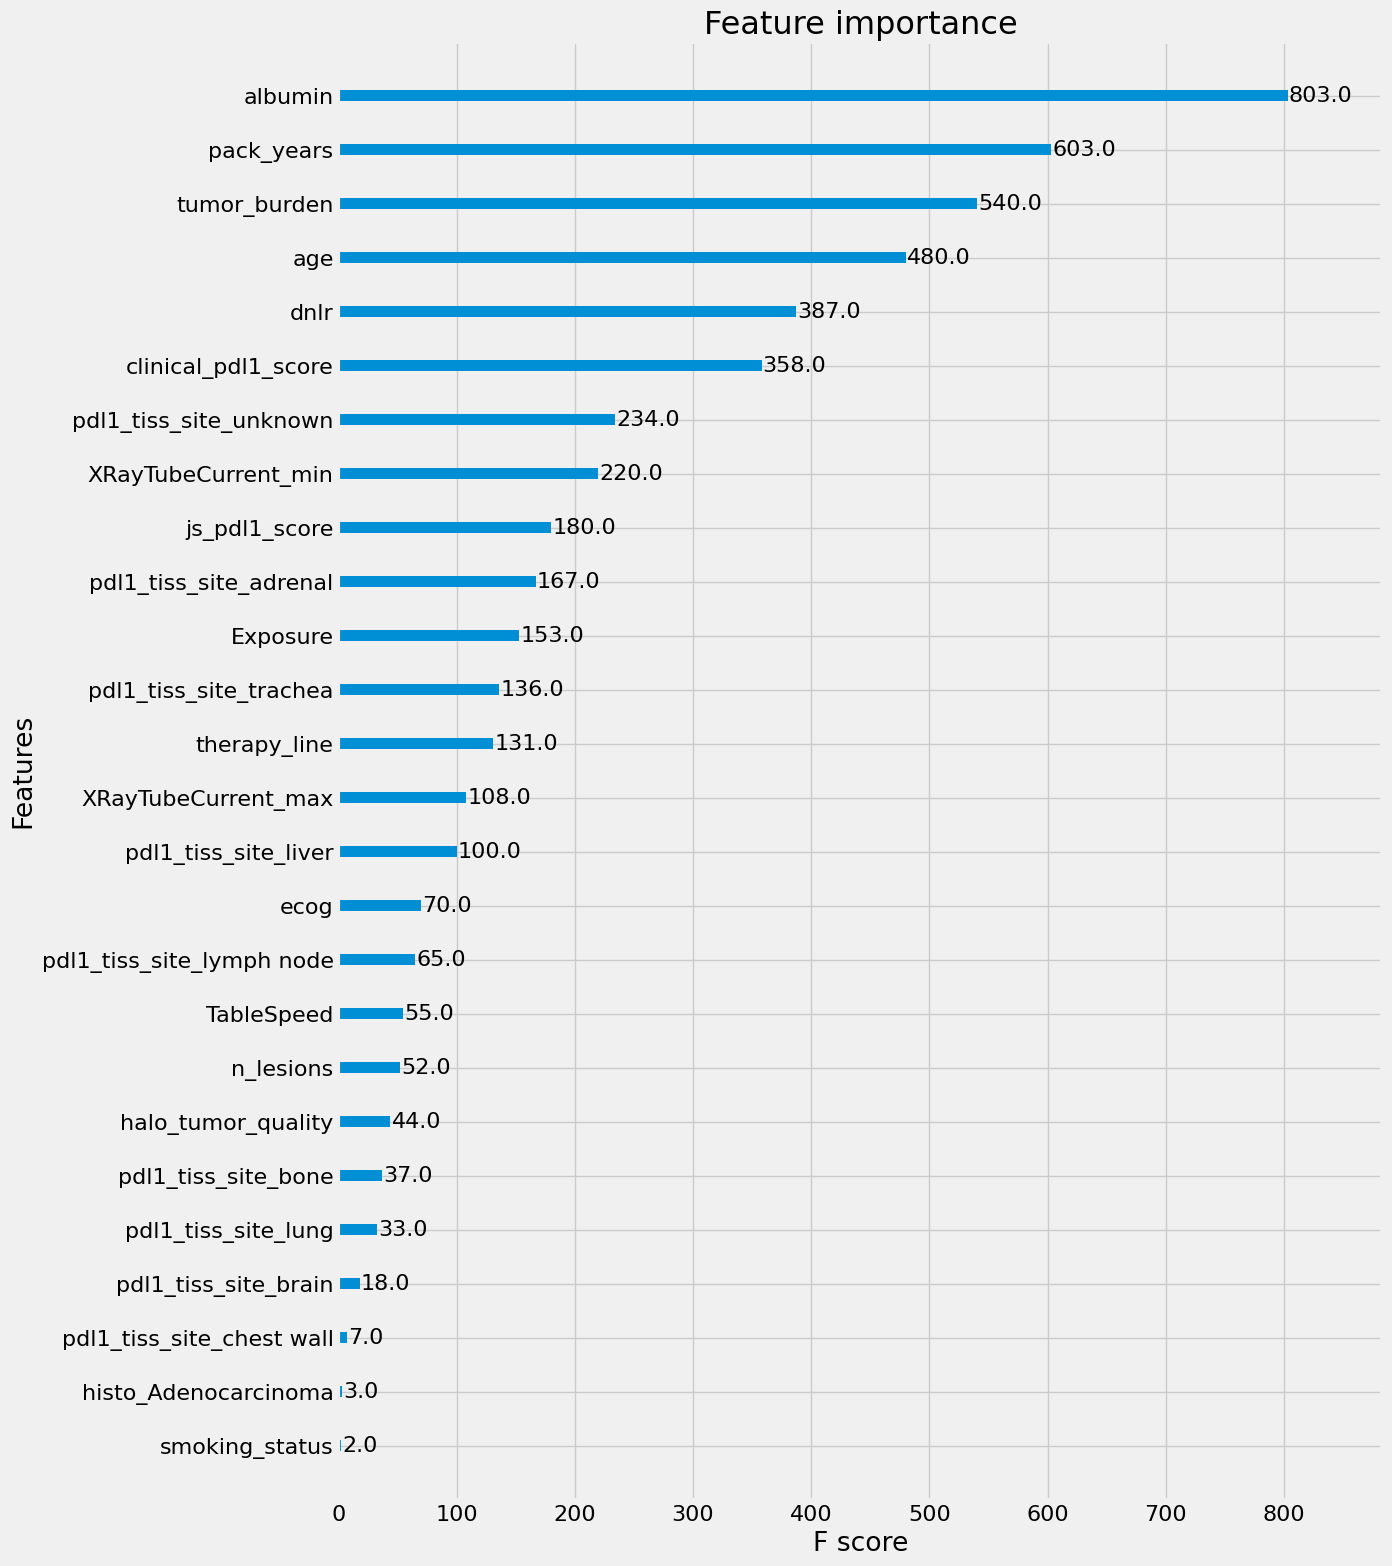

In [35]:
from xgboost import plot_importance

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,18))
plot_importance(regressor, max_num_features= x_train.shape[1], ax=ax)
plt.show()

As we can see in the image above, the features with importance less than 10.0 are:
- pdl1_tiss_site_chest wall
- histo_adenocarcinoma
- smoking_status

So, removing these features will improve our model's predective power!

In [36]:
# create a dictionary to store the results of each model
results = {} #Create a dictionary to store the results of each model
results['XGBoost Regression'] = {'MSE': MSE, 'MAE': MAE}

# Alternative Models

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

#Let's fit a linear regression model to the data
# Create a linear regression model
lr = LinearRegression()
# Fit the model on the training data
lr.fit(x_train, y_train)
#Predict on the test data
y_pred = lr.predict(x_test)
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#Store the results in the dictionary
results['Linear Regression'] = {'MSE': mse, 'MAE': mae}
#Print the results
print('Linear Regression:')
print('MSE:', mse)
print('MAE:', mae)

Linear Regression:
MSE: 2.768049188645844e+21
MAE: 14877376900.467491


In [38]:
#Let's fit a lasso regression model to the data
# Create a lasso regression model
lasso = Lasso()
# Fit the model on the training data
lasso.fit(x_train, y_train)
#Cross validate the model on the training data
y_pred = lasso.predict(x_test)
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#Store the results in the dictionary
results['Lasso Regression'] = {'MSE': mse, 'MAE': mae}
#Print the results

print('Lasso Regression:')
print('MSE:', mse)
print('MAE:', mae)

Lasso Regression:
MSE: 0.02558374433406919
MAE: 0.12083663109914014


In [39]:
lasso.coef_

array([ 0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,
       -0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,
       -0., -0., -0., -0.,  0.,  0.])

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


# Define a range of alpha values to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Lasso regression model
lasso = Lasso()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV on the preprocessed training data
grid_search.fit(x_train, y_train)

# Get the best Lasso model with tuned hyperparameters
best_lasso = grid_search.best_estimator_

# Predict on the preprocessed test data using the best model
y_pred = best_lasso.predict(x_test)

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Store the results in the dictionary
results['Tuned Lasso Regression'] = {'MSE': mse, 'MAE': mae}

# Print the results
print('Tuned Lasso Regression:')
print('Best Hyperparameters:', grid_search.best_params_)
print('MSE:', mse)
print('MAE:', mae)

Tuned Lasso Regression:
Best Hyperparameters: {'alpha': 0.001}
MSE: 0.027596878993574485
MAE: 0.11733121641706268


In [41]:
#Ridge Regression
# Create a ridge regression model
ridge = Ridge()
#Fit the model on the training data
ridge.fit(x_train, y_train)
#Predict on the test data
y_pred = ridge.predict(x_test)
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#Store the results in the dictionary
results['Ridge Regression'] = {'MSE': mse, 'MAE': mae}
#Print the results
print('Ridge Regression:')
print('MSE:', mse)
print('MAE:', mae)

Ridge Regression:
MSE: 0.028967534742744237
MAE: 0.1215162015363153


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge


# Define a distribution of alpha values to sample from
param_dist = {'alpha': np.logspace(-3, 2, 100)}

# Create a Ridge regression model
ridge = Ridge()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=20, cv=5, random_state=42)

# Fit the RandomizedSearchCV on the preprocessed training data
random_search.fit(x_train, y_train)

# Get the best Ridge model with tuned hyperparameters
best_ridge = random_search.best_estimator_

# Predict on the preprocessed test data using the best model
y_pred = best_ridge.predict(x_test)

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Store the results in the dictionary
results['Tuned Ridge Regression (Randomized Search)'] = {'MSE': mse, 'MAE': mae}

# Print the results
print('Tuned Ridge Regression (Randomized Search):')
print('Best Hyperparameters:', random_search.best_params_)
print('MSE:', mse)
print('MAE:', mae)

Tuned Ridge Regression (Randomized Search):
Best Hyperparameters: {'alpha': 10.974987654930567}
MSE: 0.02714636198098351
MAE: 0.11480091448421964


In [43]:
#Elastic Net Regression
# Create an elastic net regression model
elastic_net = ElasticNet()
#Fit the model on the training data
elastic_net.fit(x_train, y_train)
#Predict on the test data
y_pred = elastic_net.predict(x_test)
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#Store the results in the dictionary
results['Elastic Net Regression'] = {'MSE': mse, 'MAE': mae}
#Print the results
print('Elastic Net Regression:')
print('MSE:', mse)
print('MAE:', mae)

Elastic Net Regression:
MSE: 0.02558374433406919
MAE: 0.12083663109914014


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet


# Define a distribution of hyperparameters to sample from
param_dist = {
    'alpha': np.logspace(-3, 2, 100),  # Range of alpha values
    'l1_ratio': np.linspace(0, 1, 50)  # Range of l1_ratio values
}

# Create an Elastic Net regression model
elastic_net = ElasticNet()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=elastic_net, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=20, cv=5, random_state=42)

# Fit the RandomizedSearchCV on the preprocessed training data
random_search.fit(x_train, y_train)

# Get the best Elastic Net model with tuned hyperparameters
best_elastic_net = random_search.best_estimator_

# Predict on the preprocessed test data using the best model
y_pred = best_elastic_net.predict(x_test)

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Store the results in the dictionary
results['Tuned Elastic Net Regression (Randomized Search)'] = {'MSE': mse, 'MAE': mae}

# Print the results
print('Tuned Elastic Net Regression (Randomized Search):')
print('Best Hyperparameters:', random_search.best_params_)
print('MSE:', mse)
print('MAE:', mae)

Tuned Elastic Net Regression (Randomized Search):
Best Hyperparameters: {'l1_ratio': 0.3877551020408163, 'alpha': 0.00572236765935022}
MSE: 0.02606648844883719
MAE: 0.112594523040732


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define a range of polynomial degrees to search over
param_grid = {'poly__degree': [1, 2, 3, 4]}

# Create a PolynomialFeatures transformer
poly = PolynomialFeatures(include_bias=False)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Create a pipeline for Polynomial Regression
pipeline = Pipeline([
    ('poly', poly),
    ('regressor', linear_reg)
])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV on the preprocessed training data
grid_search.fit(x_train, y_train)

# Get the best Polynomial Regression model with tuned degree
best_polynomial_model = grid_search.best_estimator_

# Predict on the preprocessed test data using the best model
y_pred = best_polynomial_model.predict(x_test)

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Store the results in the dictionary
results['Tuned Polynomial Regression'] = {'MSE': mse, 'MAE': mae}

# Print the results
print('Tuned Polynomial Regression:')
print('Best Hyperparameters:', grid_search.best_params_)
print('MSE:', mse)
print('MAE:', mae)


Tuned Polynomial Regression:
Best Hyperparameters: {'poly__degree': 3}
MSE: 0.07190367218113762
MAE: 0.2014219759601376


We will not use the code below for technical isues!

In [46]:
"""
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# Initialize and fit the models
models = {
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'LightGBM Regression': lgb.LGBMRegressor()
}


for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'MSE': mse, 'MAE': mae}
"""

"\nfrom sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nimport xgboost as xgb\nimport lightgbm as lgb\n\n# Initialize and fit the models\nmodels = {\n    'Support Vector Regression': SVR(),\n    'Decision Tree Regression': DecisionTreeRegressor(),\n    'Random Forest Regression': RandomForestRegressor(),\n    'Gradient Boosting Regression': GradientBoostingRegressor(),\n    'XGBoost Regression': xgb.XGBRegressor(),\n    'LightGBM Regression': lgb.LGBMRegressor()\n}\n\n\nfor model_name, model in models.items():\n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    \n    mse = mean_squared_error(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    \n    results[model_name] = {'MSE': mse, 'MAE': mae}\n"

In [47]:
# Print the results for each model
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print('MSE:', metrics['MSE'])
    print('MAE:', metrics['MAE'])
    print()
    # Findin out the best performing model
    best_MSE = metrics['MSE']
    best_MAE = metrics['MAE']
    if metrics['MSE'] > best_MSE and metrics['MAE'] > best_MSE:
        best_model = model_name
        best_MSE = metrics['MSE']
        best_MSE = metrics['MAE']
    else:
        pass

XGBoost Regression:
MSE: 0.02187057635308682
MAE: 0.10675732848200264

Linear Regression:
MSE: 2.768049188645844e+21
MAE: 14877376900.467491

Lasso Regression:
MSE: 0.02558374433406919
MAE: 0.12083663109914014

Tuned Lasso Regression:
MSE: 0.027596878993574485
MAE: 0.11733121641706268

Ridge Regression:
MSE: 0.028967534742744237
MAE: 0.1215162015363153

Tuned Ridge Regression (Randomized Search):
MSE: 0.02714636198098351
MAE: 0.11480091448421964

Elastic Net Regression:
MSE: 0.02558374433406919
MAE: 0.12083663109914014

Tuned Elastic Net Regression (Randomized Search):
MSE: 0.02606648844883719
MAE: 0.112594523040732

Tuned Polynomial Regression:
MSE: 0.07190367218113762
MAE: 0.2014219759601376



In [48]:
print(f"The best model is: \n {model_name} \n MSE: {best_MSE} \n MAE: {best_MAE}")

The best model is: 
 Tuned Polynomial Regression 
 MSE: 0.07190367218113762 
 MAE: 0.2014219759601376


### Saving The Best Model

In [49]:
import pickle
pickle.dump(best_polynomial_model, open('Tuned_Polynomial_Regressor.pkl', 'wb'))

### Loading The Saved Model

In [50]:
pickled_model = pickle.load(open('Tuned_Polynomial_Regressor.pkl', 'rb'))

Now, we will test our saved model on the first sample from testing set:

In [51]:
x_test.head(1)

,albumin,pack_years,dnlr,age,clinical_pdl1_score,halo_tumor_quality,js_pdl1_score,tumor_burden,Exposure,TableSpeed,XRayTubeCurrent_min,XRayTubeCurrent_max,smoking_status,ecog,n_lesions,therapy_line,histo_Adenocarcinoma,histo_Adenosquamous,histo_Giant Cell,histo_Large Cell,histo_Large cell,histo_NOS,histo_Pleomorphic,histo_Squamous,sex_female,sex_male,pdl1_tiss_site_adrenal,pdl1_tiss_site_ascites,pdl1_tiss_site_bone,"pdl1_tiss_site_bone, soft tissue",pdl1_tiss_site_brain,pdl1_tiss_site_chest wall,pdl1_tiss_site_duodenum,pdl1_tiss_site_liver,pdl1_tiss_site_lung,pdl1_tiss_site_lymph node,pdl1_tiss_site_mediastinum,pdl1_tiss_site_pelvis,pdl1_tiss_site_peritoneum,pdl1_tiss_site_pleura,pdl1_tiss_site_pleural fluid,"pdl1_tiss_site_skin, muscle, fat",pdl1_tiss_site_soft tissue (C2),pdl1_tiss_site_soft tissue (L2),pdl1_tiss_site_soft tissue (L3),pdl1_tiss_site_soft tissue (T9),pdl1_tiss_site_soft tissue (abdomen),pdl1_tiss_site_soft tissue (chest wall),pdl1_tiss_site_soft tissue (glenoid),pdl1_tiss_site_soft tissue (gluteus),pdl1_tiss_site_soft tissue (humerus),pdl1_tiss_site_soft tissue (iliac),pdl1_tiss_site_soft tissue (neck),pdl1_tiss_site_soft tissue (rib),pdl1_tiss_site_soft tissue (spine),pdl1_tiss_site_soft tissue (thigh),pdl1_tiss_site_trachea,pdl1_tiss_site_unknown
33,0.696,0.045,0.003,0.564,0.010,1.000,0.000,0.132,0.485,0.023,0.080,0.482,1,1,1.000,1.000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
pred = pickled_model.predict(x_test)
print("predicted PFS time is: ", pred[0], " months")

predicted PFS time is:  0.1436374111174844  months


We want the time to be calculated in dayes so we will multiply it by 30:

In [53]:
print("predicted PFS time is: ", round(pred[0]*30), " days")

predicted PFS time is:  4  days
